In [12]:
import pandas as pd

# Load the cleaned dataset
file_path = "../data/cleaned_data.csv" 
df = pd.read_csv(file_path)

# Check the first few rows
display(df.head())

,genre,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,7
1,pop,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,7
2,pop,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,7
3,pop,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,7
4,pop,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,7


In [2]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check dataset shape
print(f"Dataset Shape: {df.shape}")

# Inspect data types
df.info()

Missing Values:
genre                 0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64
Dataset Shape: (1200, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   genre          

C:\Users\Saul\AppData\Local\Temp\ipykernel_24232\2988392081.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['genre'], order=df['genre'].value_counts().index, palette="viridis")


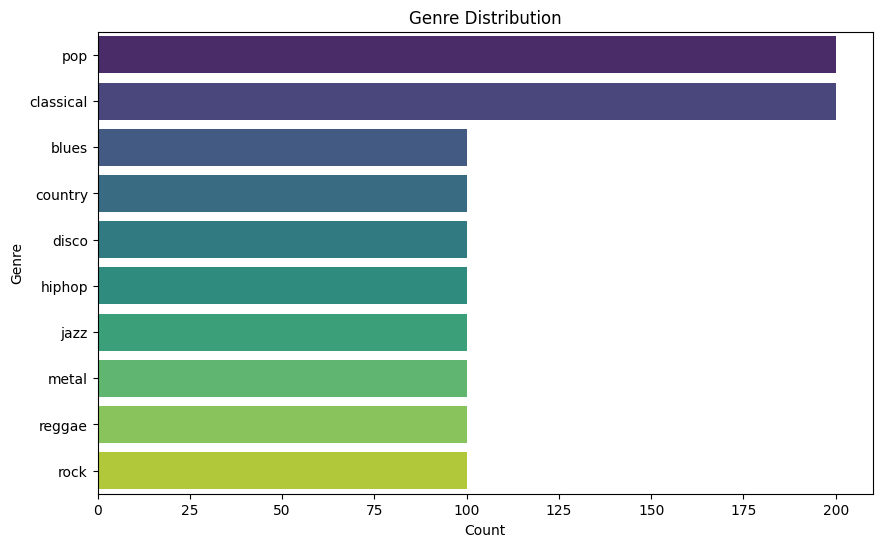

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['genre'], order=df['genre'].value_counts().index, palette="viridis")
plt.title("Genre Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(columns=['genre', 'label'])
y = df['label']

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate model
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.48      0.54        23
           1       0.92      0.98      0.95        46
           2       0.52      0.61      0.56        18
           3       0.53      0.47      0.50        17
           4       0.68      0.62      0.65        21
           5       0.67      0.59      0.62        17
           6       0.63      0.86      0.73        22
           7       0.90      0.90      0.90        41
           8       0.54      0.44      0.48        16
           9       0.37      0.37      0.37        19

    accuracy                           0.70       240
   macro avg       0.64      0.63      0.63       240
weighted avg       0.70      0.70      0.69       240



In [8]:
import numpy as np

# Inspect model coefficients
coefficients = log_reg.coef_
feature_importance = np.mean(np.abs(coefficients), axis=0)
print("Feature Importance:", feature_importance)

Feature Importance: [0.34542439 0.29983213 1.13454807 0.78770572 0.50690777 0.59188941
 0.53681725 0.68736638 1.1618057  0.76462265 0.51224856 0.80265265
 0.32990416 0.57841966 0.43776221 0.38194807 0.56360595 0.35395976
 0.67423357 0.53916878 0.3356956  0.35464562 0.3825425  0.27938312
 0.59786117 0.34850033 0.29958935 0.28902747]
